In [ ]:
import os
import matplotlib.pyplot as plt
import pyNexafs as pnx

# Get the current working directory
# Usually the folder you opened your IDE into.
cwd = os.getcwd()

# Construct the file path to the MEX2 data file
filepath = os.path.join(cwd, "tests/test_data/au/MEX2/2025-03", "MEX2_13385.mda")

# Check if the file exists.
os.path.exists(filepath)

True

In [ ]:
# Load MEX2 data file
parser = pnx.parsers.au.MEX2_NEXAFS(
    filepath=filepath,  # The .xdi or .mda filepath
    header_only=False,
    relabel=True,
    energy_bin_domain=(2230, 2390),  # Center at 2.31 keV
    use_recent_binning=False,
)

['MEX2ES01DPP02:MCA1:ArrayData', 'MEX2ES01DPP02:MCA2:ArrayData', 'MEX2ES01DPP02:MCA3:ArrayData', 'MEX2ES01DPP02:MCA4:ArrayData']
Traceback:  c:\Github\pyNexafs\tests/test_data/au/MEX2/2025-03\MEX2_13385.mda


Traceback (most recent call last):
  File "c:\Github\pyNexafs\pyNexafs\parsers\_base.py", line 1727, in file_parser
    parse_fn(file, header_only, **fn_kwargs)
    ~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Github\pyNexafs\pyNexafs\parsers\au\aus_sync\MEX2.py", line 678, in parse_mda_2024_11
    mda_2d_scan.labels() == fluorescence_labels
AssertionError


In [4]:
display(parser.labels[0:12])

display(parser.COLUMN_ASSIGNMENTS)

['Energy Setpoint',
 'Gate Time Setpoint',
 'Energy',
 'Bragg',
 'Current Monitor',
 'Beam Intensity Monitor',
 'I0',
 'SampleDrain',
 'MEX2ES01DAQ01:ch4:S:MeanValue_RBV',
 'MEX2ES01DPP02:DTC_Window1_AVG_CPS',
 'MEX2ES01DPP02:DTC_Window2_AVG_CPS',
 'MEX2ES01ZEB01:PC_GATE_WID:RBV']

{'x': ('Energy', 'Energy Setpoint', 'energy'),
 'y': [('I0', 'i0'),
  ('Sample Drain', 'SampleDrain'),
  ('Fluorescence', 'ifluor', 'Fluorescence Sum', 'Fluorescence Sum (Reduced)'),
  ('Count Time', 'count_time'),
  'ICR_AVG',
  'OCR_AVG',
  'Fluorescence Detector 1',
  'Fluorescence Detector 2',
  'Fluorescence Detector 3',
  'Fluorescence Detector 4',
  ('Bragg', 'bragg')],
 'y_errs': None,
 'x_errs': None}

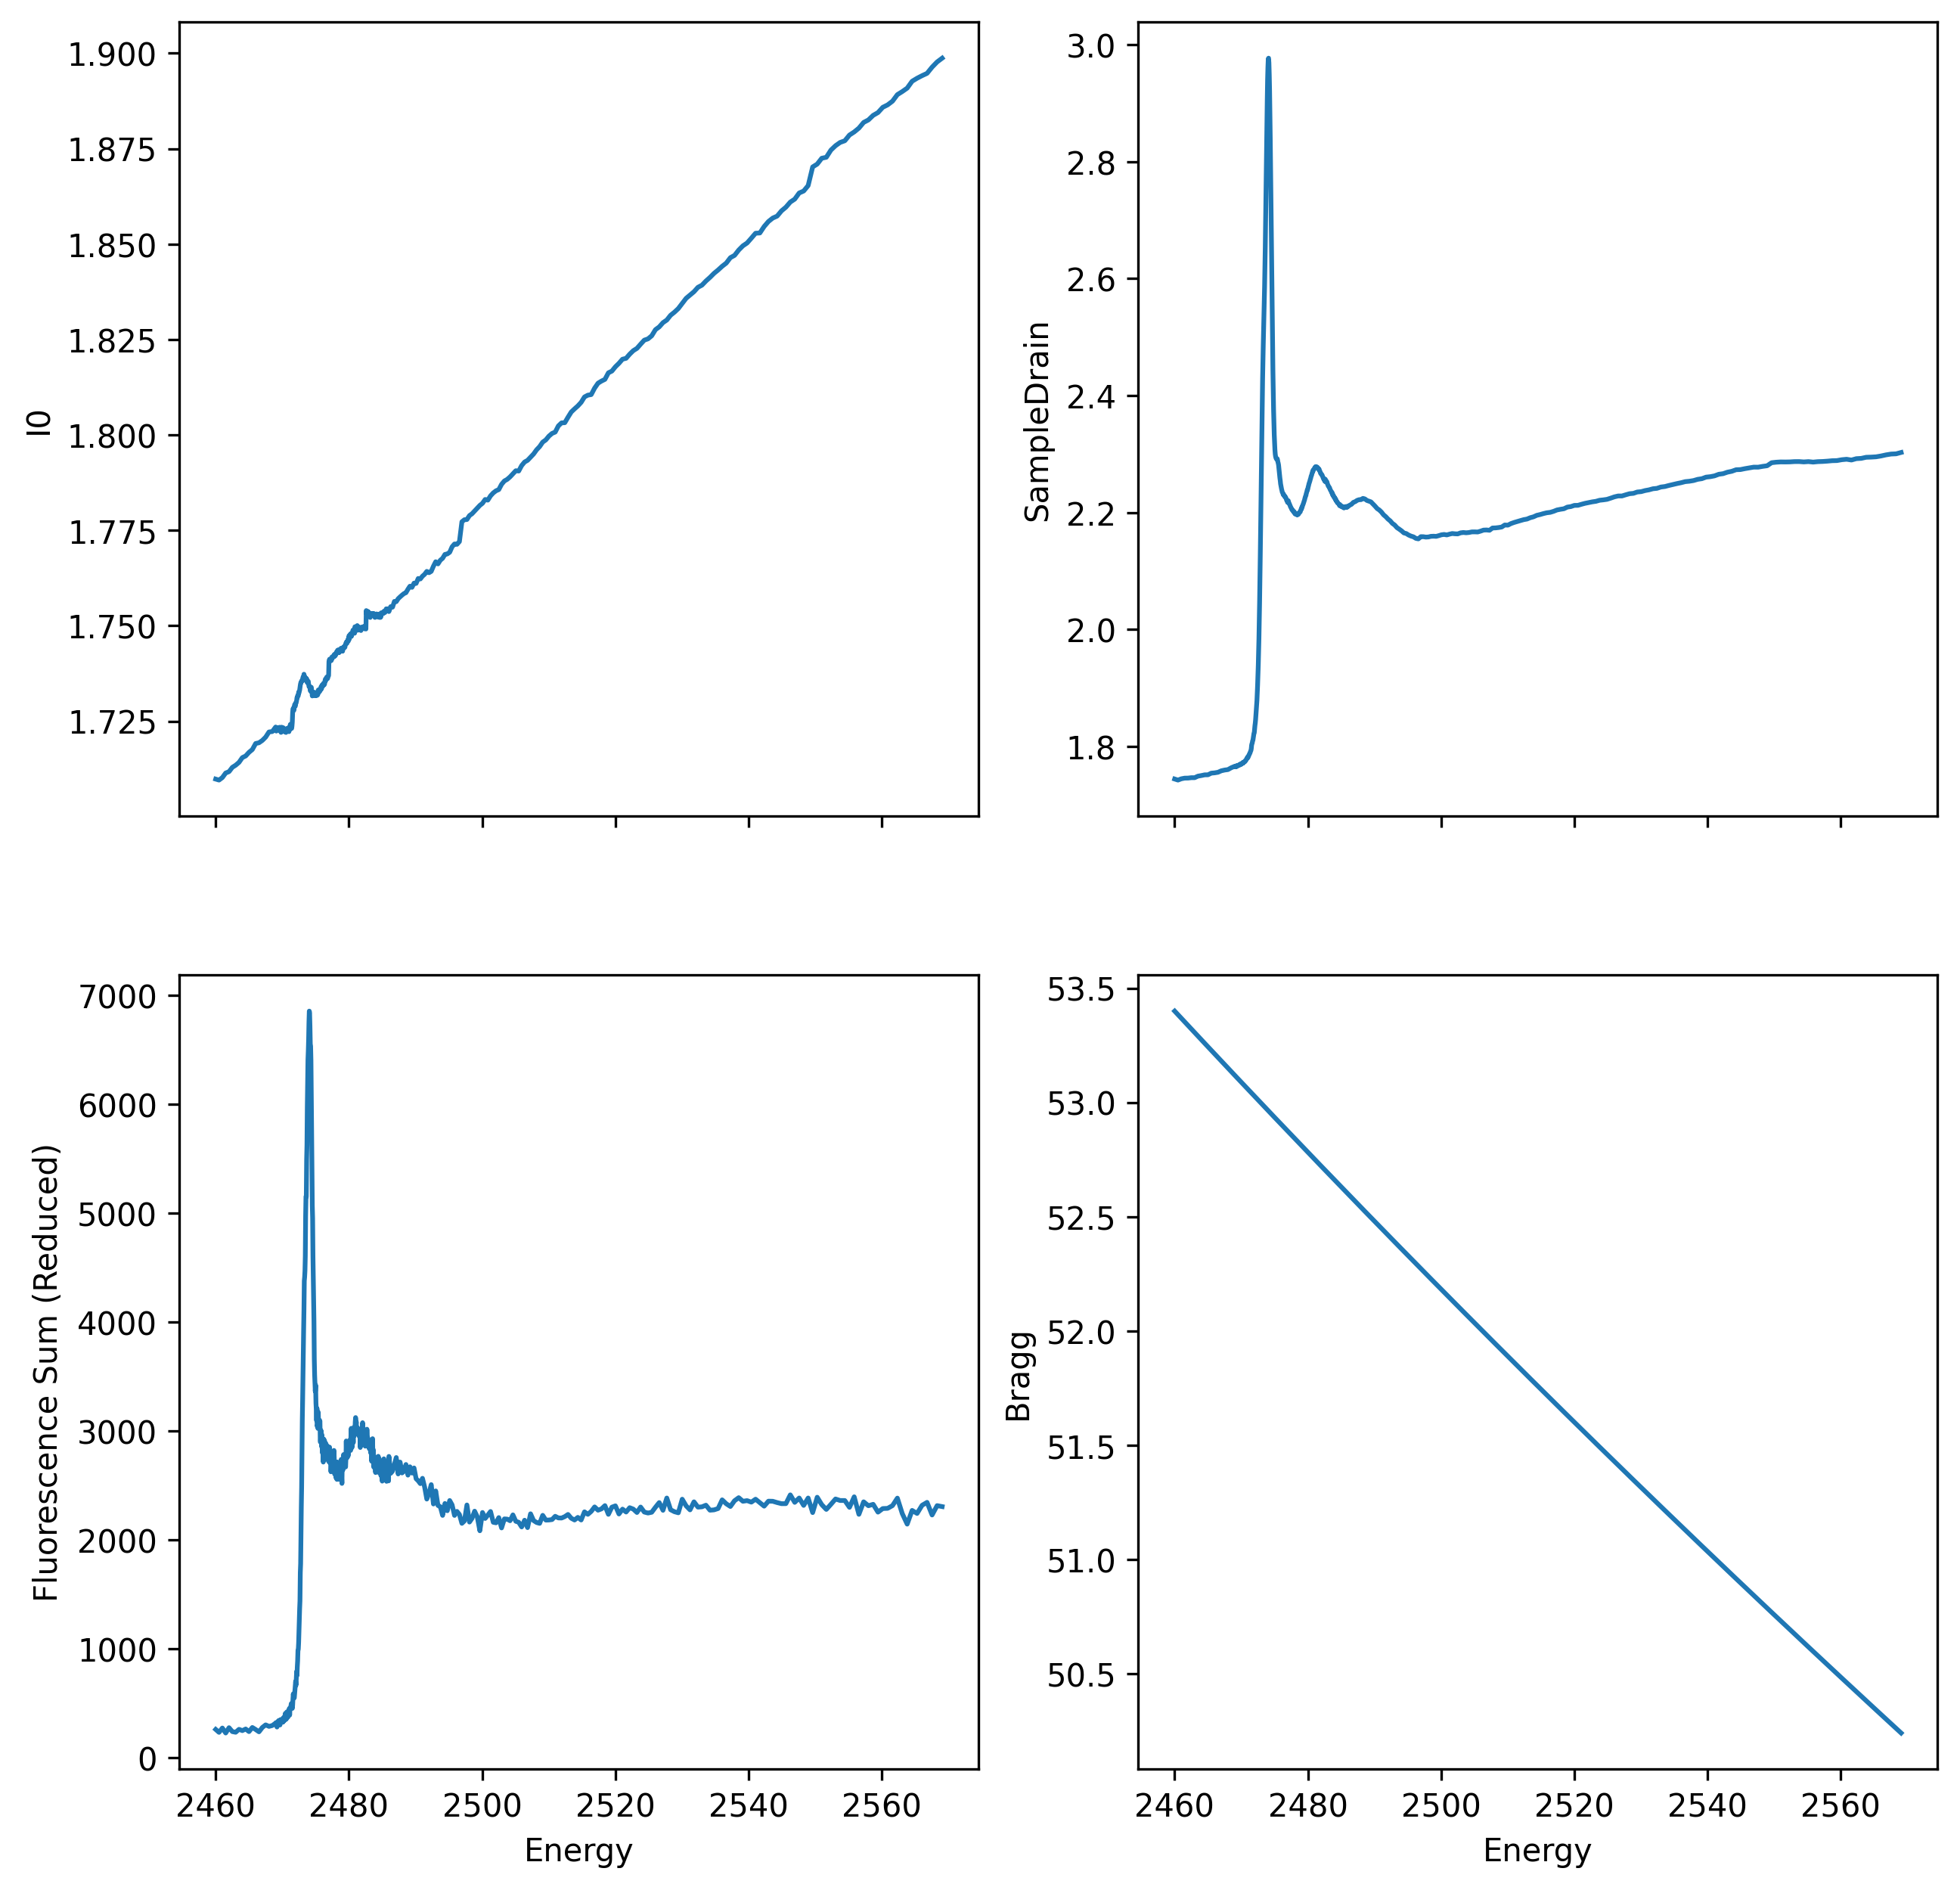

In [ ]:
scan = parser.to_scan()
fig = scan.snapshot()
pass

c:\Github\pyNexafs\pyNexafs\nexafs\scan.py:773: UserWarning: Label ('Count Time', 'count_time') not found in parser object <pyNexafs.parsers.au.aus_sync.MEX2.MEX2_NEXAFS object at 0x000001972D0D4440>.
  warnings.warn(
c:\Github\pyNexafs\pyNexafs\nexafs\scan.py:773: UserWarning: Label ICR_AVG not found in parser object <pyNexafs.parsers.au.aus_sync.MEX2.MEX2_NEXAFS object at 0x000001972D0D4440>.
  warnings.warn(
c:\Github\pyNexafs\pyNexafs\nexafs\scan.py:773: UserWarning: Label OCR_AVG not found in parser object <pyNexafs.parsers.au.aus_sync.MEX2.MEX2_NEXAFS object at 0x000001972D0D4440>.
  warnings.warn(
c:\Github\pyNexafs\pyNexafs\nexafs\scan.py:773: UserWarning: Label Fluorescence Detector 1 not found in parser object <pyNexafs.parsers.au.aus_sync.MEX2.MEX2_NEXAFS object at 0x000001972D0D4440>.
  warnings.warn(
c:\Github\pyNexafs\pyNexafs\nexafs\scan.py:773: UserWarning: Label Fluorescence Detector 2 not found in parser object <pyNexafs.parsers.au.aus_sync.MEX2.MEX2_NEXAFS object at 

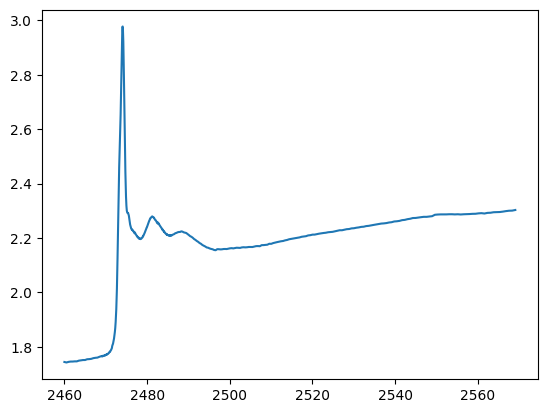

In [ ]:
scan = parser.to_scan()
x, y = scan.x, scan.y[:, scan.y_labels.index("SampleDrain")]

fig, ax = plt.subplots(1, 1)
ax.plot(x, y)

None


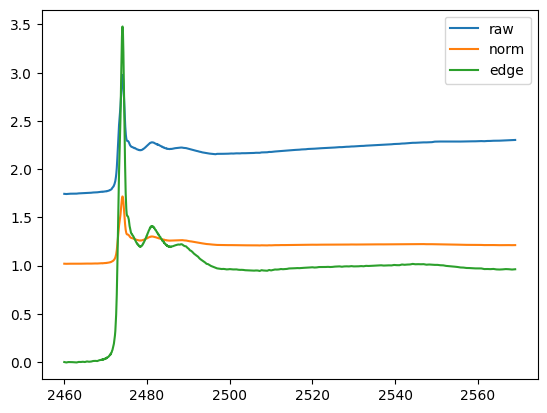

In [10]:
scan_norm = pnx.nexafs.scanNorm(scan, "I0")
scan_edge = pnx.nexafs.scanNormEdges(
    scan_norm, pre_edge_domain=(2460, 2465), post_edge_domain=(2540, 2560)
)

fig, ax = plt.subplots()
for i, s in enumerate([scan, scan_norm, scan_edge]):
    x, y = s.x, s.y[:, s.y_labels.index("SampleDrain")]
    ax.plot(x, y, label=["raw", "norm", "edge"][i])
ax.legend()

In [11]:
scan.y_labels

['I0', 'SampleDrain', 'Fluorescence Sum (Reduced)', 'Bragg']

In [12]:
scan.y_units

[None, None, 'a.u.', None]

In [13]:
mda = pnx.utils.mda.MDAFileReader(filepath)

In [14]:
mda.read_header_as_dict()

{'mda_version': 1.399999976158142,
 'mda_scan_number': 13385,
 'mda_rank': 2,
 'mda_dimensions': [520, 4096],
 'mda_isRegular': 1,
 'mda_pExtra': 34398964,
 'mda_pmain_scan': 28}

In [15]:
mda.read_parameters()

{'MEX2SSCAN01:saveData_comment1': ('GUI comment 1 field',
  None,
  'P3HT_1 55 degree'),
 'MEX2SSCAN01:saveData_comment2': ('GUI comment 2 field', None, None),
 'MEX2SSCAN01:saveData_realTime1D': ('string', None, 'No'),
 'MEX2SSCAN01:saveData_fileSystem': ('filesystem',
  None,
  '/beamline/data/mex/mex2'),
 'MEX2SSCAN01:saveData_subDir': ('subdirectory',
  None,
  'user_data/2025/1/23634d'),
 'MEX2SSCAN01:saveData_fileName': ('Name of this file',
  None,
  'MEX2_13385.mda'),
 'MEX2SSCAN01:scan1.P1SM': ('scan mode', None, 'TABLE'),
 'MEX2SSCAN01:scan1.P2SM': ('scan mode', None, 'TABLE'),
 'MEX2SSCAN01:scan1.P3SM': ('scan mode', None, 'TABLE'),
 'MEX2SSCAN01:scan1.P4SM': ('scan mode', None, 'TABLE'),
 'MEX2SSCAN01:scanTypeSpec': ('scan type', None, None),
 'MEX2SSCAN01:scan1.BSPV': ('Before scan PV', None, None),
 'MEX2SSCAN01:scan1.BSCD': ('Before scan value', None, 1.0),
 'MEX2SSCAN01:scan1.BSWAIT': ('Before scan wait', None, 'Wait'),
 'MEX2SSCAN01:scan1.ASPV': ('After scan PV', None,

In [ ]:
data, scan_headers = mda.read_scans()

In [18]:
data[0].shape, scan_headers[0].labels().__len__()

((520, 66), 66)

In [19]:
data[1].shape, scan_headers[1].labels().__len__()

((520, 4096, 4), 4)